In [32]:
from numpy import *                                    
from mpl_toolkits.mplot3d import Axes3D ;
from matplotlib import image;
from matplotlib import figure
import time
import numpy as np
import matplotlib.pyplot as plt
import pylab as p


    start_time = time.time()



    t=0.0                                                    #inizialite time
                                                #Time Step
    MaxErr=0.000001                                             #the program will stop if iteration has converged

    MaxTimeStep=50                                                #Number iterations
    MaxSORIt=100                                            #Number of Iterations SOR method

                                                   #Grid parameters

    domaincenterhorizontalvelocity=[]        #) Place a probe at the domain center to compare the time history of the horizontal velocity (u )
    timearray=[]             #time history array

    logT=zeros((Nxmax,Nymax),float)                 #velocityx=u
    velocityy=zeros((Nxmax,Nymax),float)                 #velocityy=v
    sf=zeros((Nxmax,Nymax),float)                    #Stream function
    vt=zeros((Nxmax,Nymax),float)                    #Vorticity
    vRHS=zeros((Nxmax,Nymax),float)                  #RHS Vorticity
    S0=ones((Nxmax,Nymax),float)                  
    
    nu=1                                                      # Viscosity
    V0=1.0                                                    # Initial v
    omega=2/(1+sin(pi/(Nxmax+1)))                                                # Relaxation param


    #stability criteria= Deltat/(Re*h*h)<0.25, so h should be:  h>((deltat/(Re*0.25))^(1/2))                                                       
    

    def vorticityRHSsolve():            
        for  i in range(1,Nxmax-1):                                         
            for j in range(1,Nymax-1):  
                vRHS[i,j]=-0.25*((sf[i,j+1]-sf[i,j-1])*(vt[i+1,j]-vt[i-1,j])-(sf[i+1,j]-sf[i-1,j])*(vt[i,j+1]-vt[i,j-1]))/(h*h) +(1/Re)*(vt[i+1,j]+vt[i-1,j]+vt[i,j+1]+vt[i,j-1]-4.0*vt[i,j])/(h*h)          


    def streamfunctionsolveSor():                                         # Method SOR to solve stream function 
        for i in range(1,MaxSORIt):#Foor Loop Max Iterations 
            for i in range(1,Nxmax-1):                                         
                for j in range (1,Nymax-1):
                    sf[i,j]=omega*(0.25*(sf[i+1,j]+sf[i-1,j]+sf[i,j+1]+sf[i,j-1]+h*h*vt[i,j]))+(1-omega)*sf[i,j]



    def vorticityborders():
        for j in range (1,Nymax-1):  
            vt[0,j]=-2.0*sf[1,j]/(h*h)                #Left Border

        for i in range (1 ,Nxmax-1):
            vt[i,Nymax-1]=-2.0*sf[i,Nymax-2]/(h*h) -2.0*V0/h           #top wall                         #Top Border    

        for j in range (1 ,Nymax-1):  
            vt[Nxmax-1,j]=-2.0*sf[Nxmax-2,j]/(h*h)         #Right border

        for i in range (1 ,Nxmax-1):
            vt[i,0]=-2.0*sf[i,1]/(h*h)  -2.0*Vbottomwall/h   #BOTTOM


    for iterations in range(0,MaxTimeStep):
        streamfunctionsolveSor()
        vorticityborders()
        vorticityRHSsolve()
        for  i in range (1, Nxmax-1):
            for  j in range(1,Nymax-1): 
                 vt[i,j]=vt[i,j]+dt*vRHS[i,j]                        #update the vorticity in the interior points
        domaincenterhorizontalvelocity=domaincenterhorizontalvelocity+[(sf[int(Nxmax/2)-1,int(Nymax/2)]-sf[int(Nxmax/2)-1,int(Nymax/2) -2])/(2*h)]
        t=t+dt
        timearray=timearray + [t]





    velocityx=zeros((Nxmax,Nymax),float)                 #velocityx=u
    velocityy=zeros((Nxmax,Nymax),float)                 #velocityy=v
    for  i in range(1,Nxmax-1):                                         
            for j in range(1,Nymax-1):
                velocityx[i,j]=(sf[i,j+1]-sf[i,j-1])/(2*h)        
                velocityy[i,j]=-(sf[i+1,j]-sf[i-1,j])/(2*h) 


    pressure=zeros((Nxmax,Nymax),float)            
    for  i in range(1,Nxmax-1):                                         
            for j in range(1,Nymax-1):
                pressure[i,j]=0.25*(pressure[i+1,j] +pressure[i-1,j]+pressure[i,j+1]+pressure[i,j-1] - (h/dt)*(velocityx[i+1,j]-velocityx[i,j]+velocityy[i,j+1]-velocityy[i,j]))     



    for j in range (1 ,Nymax-1):  
            pressure[Nxmax-1,j]=pressure[Nxmax-2,j]          #Right border            

    for j in range (1,Nymax-1):  
            pressure[0,j]=pressure[1,j]                      #Left Border

    for i in range (1 ,Nxmax-1):
            pressure[i,Nymax-1]=pressure[i,Nymax-2]         #top wall                         

    for i in range (1 ,Nxmax-1):
            pressure[i,0]=pressure[i,1]                     #bottom border           




    x=range(0,Nxmax)
    y=range(0,Nymax)                       #to plot lines in x axis
    X,Y=p.meshgrid(x,y)                    #grid for position and time
   


   
    def functz(sf):                         #returns stream flow to plot
        z = sf[X,Y]                         #for several iterations
        return z

    def functz1(vt):                        #returns stream flow to plot
        z1 = vt[X,Y]                        #for several iterations
        return z1

    def functz2(velocityx):                        #returns stream flow to plot
        z2 = velocityx[X,Y]                        #for several iterations
        return z2

    def functz3(velocityx):                        #returns stream flow to plot
        z3 = velocityy[X,Y]                        #for several iterations
        return z3   

    def functz4(velocityx,velocityy):                        #returns stream flow to plot
        z4 = (sqrt(velocityx**2+velocityy**2))[X,Y]                        #for several iterations
        return z4     
    def functz5(pressure):                        #returns stream flow to plot
        z5 = pressure[X,Y]                        #for several iterations
        return z5

    Z=functz(sf)
    Z1=functz1(vt)
    Z2=functz2(velocityx)
    Z3=functz3(velocityy)
    Z4=functz4(velocityx,velocityy)
    Z5=functz5(pressure)

    fig1 = p.figure(figsize = (12,5))
    p.title('Stream function Contour- 2D LDCP')
    p.imshow(Z, origin='lower', aspect='auto');
    p.xlabel('Nx')
    p.ylabel('Ny')
    p.colorbar();

    fig2=p.figure(figsize = (12,5))
    p.title('Vorticity Contour- - 2D LDCP')
    p.imshow(Z1, origin='lower', aspect='auto');
    p.xlabel('Nx')
    p.ylabel('Ny')
    p.colorbar();

    fig3=p.figure(figsize = (12,5))
    p.title('X-velocity Contour- - 2D LDCP')
    p.imshow(Z2, origin='lower', aspect='auto');
    p.xlabel('Nx')
    p.ylabel('Ny')
    p.colorbar();

    fig4=p.figure(figsize = (12,5))
    p.title('Y-velocity Contour- - 2D LDCP')
    p.imshow(Z3, origin='lower', aspect='auto');
    p.xlabel('Nx')
    p.ylabel('Ny')
    p.colorbar();

    fig5=p.figure(figsize = (12,5))
    p.title('Total velocity Contour- - 2D  LDCP')
    p.imshow(Z4, origin='lower', aspect='auto');
    p.xlabel('Nx')
    p.ylabel('Ny')
    p.colorbar();
    p.show();

    fig6=p.figure(figsize = (12,5))
    p.title('Pressure Countour- - 2D LDCP')
    p.imshow(Z5, origin='lower', aspect='auto');
    p.xlabel('Nx')
    p.ylabel('Ny')
    p.colorbar();
    p.show();

    x=np.linspace(0,1,Nxmax)
    y=np.linspace(0,1,Nymax)


    u=velocityx
    v=velocityy
    speed = np.sqrt(u*u + v*v)

    plt.figure()
    plt.streamplot(x, y, -v, -u, density=1,color='b')
    plt.xlabel('lx(m)')
    plt.ylabel('ly(m)')
    plt.title("Velocity vector field in 2D LDCP")





    plt.show()

    print("finished")    
    print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
#QUESTION 1

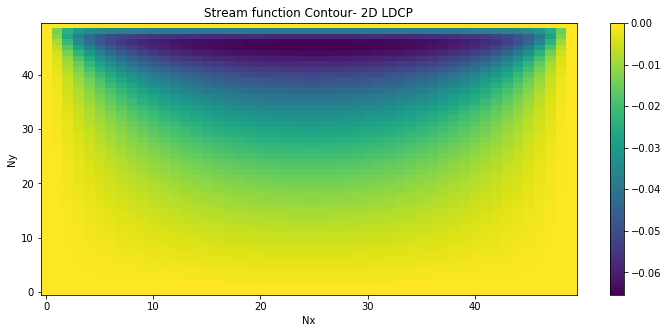

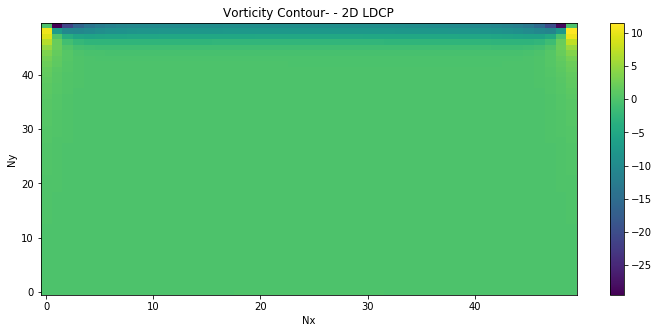

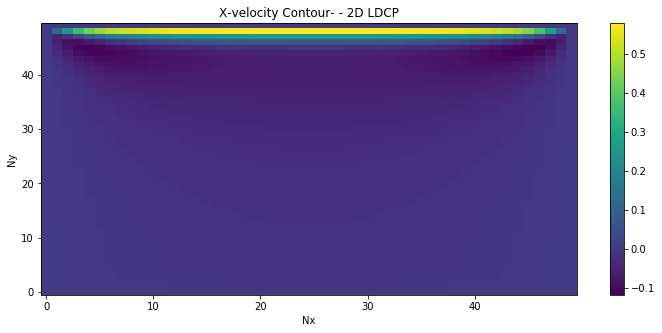

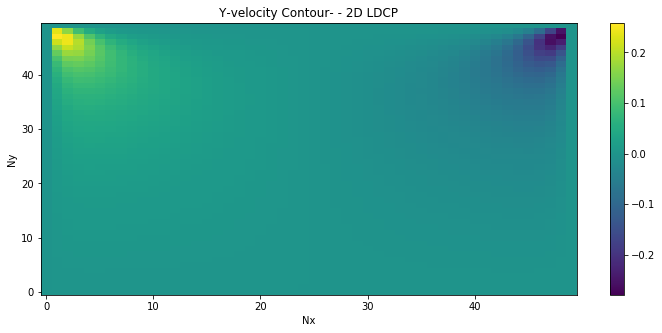

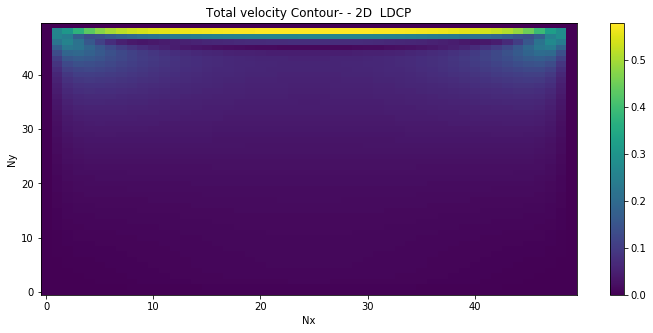

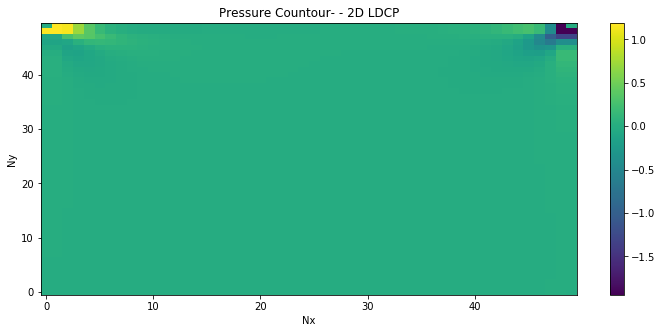

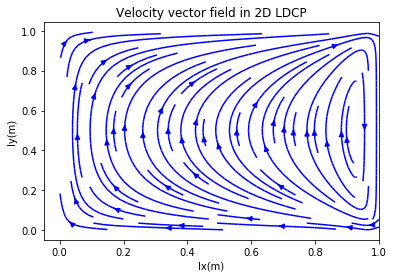

finished
--- 20.224438428878784 seconds ---


In [33]:
lDCP(50,50,10,0.05,0.001,0)    #first case,run it for plots

In [ ]:
lDCP(200,100,8000,0.05,0.001,0)     #third case

In [ ]:
#QUESTION 2

In [ ]:
lDCP(100,100,100,0.05,0.001,1)    #paralell motion,run it for plots

In [ ]:
lDCP(100,100,100,0.05,0.001,-1)     #antiparalell motion

In [ ]:
lDCP(100,100,100,0.05,0.001,0.5)    #paralell motion,diffferent velocitys